In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('credit_card_default_analysis.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
group_0 = df[df.default==0]
group_1 = df[df.default==1]

# 1st task

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


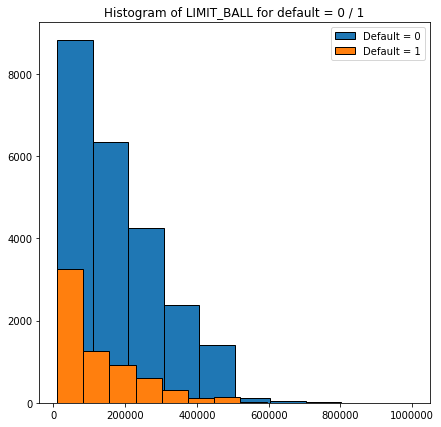

In [6]:
#histogram of LIMIT_BAL distribution
plt.figure(1, figsize=(7,7))
plt.title('Histogram of LIMIT_BALL for default = 0 / 1')
plt.hist(group_0.LIMIT_BAL, edgecolor='k', label='Default = 0')
plt.hist(group_1.LIMIT_BAL, edgecolor='k', label='Default = 1')
plt.legend()

In [7]:
sam1 = get_bootstrap_samples(group_0['LIMIT_BAL'].values,100)
sam2 = get_bootstrap_samples(group_1['LIMIT_BAL'].values,100)

In [8]:
sam1 = np.median(sam1,axis=1)
sam2 = np.median(sam2,axis=1)

In [9]:
alpha = 0.05
stat_intervals(sam1, alpha)

array([150000., 150000.])

In [10]:
stat_intervals(sam2, alpha)

array([80000., 90000.])

## интервалы не пересекаются => гипотеза о равенстве медиан отвергается

In [11]:
stats.mannwhitneyu(group_0['LIMIT_BAL'], group_1['LIMIT_BAL'])

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

## гипотеза о равенстве распред отверг на a = 0.05; результат практически значим, т.к. разница между медианами большая

# 2nd task

In [12]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

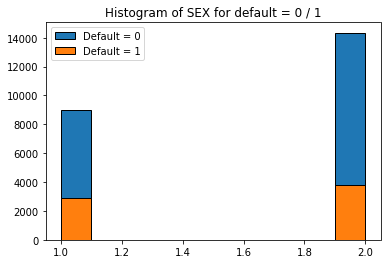

In [13]:
#histogram of SEX distribution
plt.title('Histogram of SEX for default = 0 / 1')
plt.hist(group_0.SEX, edgecolor='k', label='Default = 0')
plt.hist(group_1.SEX, edgecolor='k', label='Default = 1')
plt.legend()

## проверяем гипотезу о равенстве 2ух долей в независимых выборках

In [14]:
print('p_val: ',proportions_diff_z_test(proportions_diff_z_stat_ind(group_0['SEX']-1, group_1['SEX']-1), alternative = 'two-sided'))

p_val:  4.472866521609831e-12


In [15]:
print('conf_int: ',proportions_diff_confint_ind(group_0['SEX']-1, group_1['SEX']-1, alpha = 0.05))

conf_int:  (0.03363493274962867, 0.060548077974896725)


## гипотеза о равенстве гендерного распред. отвергается на а = 0.05 при двуст. альт., женщины чаще не возвр. кредит, чем мужч.

# 3rd task

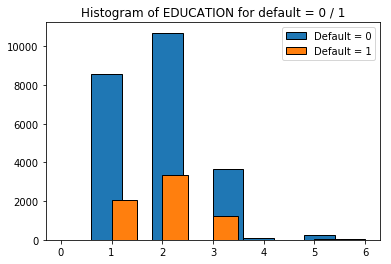

In [27]:
#histogram of SEX distribution
plt.title('Histogram of EDUCATION for default = 0 / 1')
plt.hist(group_0.EDUCATION, edgecolor='k', label='Default = 0')
plt.hist(group_1.EDUCATION, edgecolor='k', label='Default = 1')
plt.legend()

In [16]:
obs = pd.crosstab(df['EDUCATION'], df['default'])
obs

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [17]:
expected = pd.DataFrame(np.round([obs.sum(axis=1) * obs.sum(axis=0)[0] / float(obs.sum().sum()),
                                  obs.sum(axis=1) * obs.sum(axis=0)[1] / float(obs.sum().sum())])).T
expected

,0,1
0,11.0,3.0
1,8244.0,2341.0
2,10927.0,3103.0
3,3829.0,1088.0
4,96.0,27.0
5,218.0,62.0
6,40.0,11.0


Проверим гипотезу о том, что образование никак не влияет на возврат кредита, против альтернативы, что оно как-то влияет. Будем пользоваться критерием хи-квадрат, для этого, сначала, проверим условия применимости:

Выборки должны быть достаточно большими: n > 40.
Ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 не более, чем в 20% ячеек.

In [22]:
print ('samples size: {} and {}'.format(obs[0].sum(), obs[1].sum()))
expected > 5

samples size: 23364 and 6636


,0,1
0,True,False
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True


In [23]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(obs)
print ('p-value = {}'.format(p))

p-value = 1.2332626245415605e-32


На уровне значимости $\alpha = 0.05$ гипотеза о том, что образование никак не влияет на возврат кредита критерием хи-квадрат уверенно отвергается.

# 4rd task

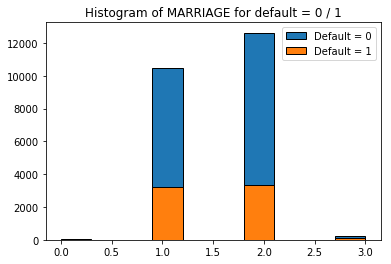

In [34]:
plt.title('Histogram of MARRIAGE for default = 0 / 1')
plt.hist(group_0.MARRIAGE, edgecolor='k', label='Default = 0')
plt.hist(group_1.MARRIAGE, edgecolor='k', label='Default = 1')
plt.legend()

Измерим взаимосвять marriage c default с помощью коэф. Крамера. для начала проверим усл. выполн.

In [24]:
obs = pd.crosstab(df['MARRIAGE'], df['default'])
obs

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [37]:
expected = pd.DataFrame(np.round([obs.sum(axis=1) * obs.sum(axis=0)[0] / float(obs.sum().sum()),
                                  obs.sum(axis=1) * obs.sum(axis=0)[1] / float(obs.sum().sum())])).T
expected

,0,1
0,42.0,12.0
1,10638.0,3021.0
2,12433.0,3531.0
3,252.0,71.0


In [38]:
expected>5

,0,1
0,True,True
1,True,True
2,True,True
3,True,True


Условия выполн.

In [39]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(obs)
k1 = obs.shape[0]
k2 = obs.shape[1]

round(np.sqrt(chi2 / (n*(min(k1, k2) - 1))), 4)

0.0345

Коэффициент V Крамера получился близким к нулю. Взаимосвязь между семейным статусом и индикатором дефолта есть, но, скорее всего, очень слабая и практически не значима.

# 5th task

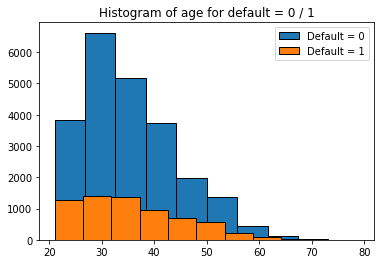

In [41]:
plt.title('Histogram of age for default = 0 / 1')
plt.hist(group_0.AGE, edgecolor='k', label='Default = 0')
plt.hist(group_1.AGE, edgecolor='k', label='Default = 1')
plt.legend()

проверим рав-во мед. знач. с пом. бутсрепа, построим доверительный интервал для среднего разности медиан

In [45]:
sam1 = get_bootstrap_samples(group_0['AGE'].values,100)
sam2 = get_bootstrap_samples(group_1['AGE'].values,100)
sam1 = np.median(sam1,axis=1)
sam2 = np.median(sam2,axis=1)
diff = sam1 - sam2
alpha = 0.05
stat_intervals(diff, alpha)

array([-1.,  0.])

т.к. 0 входит в интервал гипотезу о равенстве медиан 2ух распред отвергнуть нельзя на уровне знач = 0.05 при двуст. альт

In [46]:
group_0['AGE'].median() - group_1['AGE'].median()

0.0

проверим гипот о рав-ве распред

In [47]:
stats.mannwhitneyu(group_0['AGE'], group_1['AGE'])

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

по крит. манна - уитни распред равны при а = 0.05 и двуст. альт. Результат скорее всего практич. значим, т.к. люди в одном и том же возрасте одинаково отдают или не отдают кредит